### 4.10 Part5 YLS
#### 1 Importing libraries and df w/o PI
#### 2 analyzing Young Low Spender by Loyalty Flag
#### 3 -analyzing Young Low Spender purshease by  sales amount
#### 4 -analyzing Young Low Spender by Busiest_day
#### Analyzing by prefered hour of day
#### 6 Analyzing number of Young Low Spender by State
#### 7 Analyzing Young Low Spenders  by n_dependants
#### 8 Days since prior order
####  9  Defining TOP products for client group


### 1 Importing libraries and df w/o PII

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path=r'C:\Users\user\07-2023 Instacart Basket Analysis\02 Data'

#### -importing df

In [3]:
df=pd.read_pickle(os.path.join(path,'Prepared Data','YLS.pkl'))

In [4]:
df.columns

Index(['user_id', 'Gender', 'STATE', 'Age', 'date_joined', 'n_dependants',
       'fam_status', 'income', 'product_id', 'product_name', 'aisle_id',
       'department_id', 'prices', 'order_id', 'eval_set', 'order_number',
       'day_of_week', 'order_hour_of_day', 'days_since_prior_order',
       'add_to_cart_order', 'reordered', 'price_range_loc', 'busiest_day',
       'busiest days', 'max_order', 'loyalty_flag', 'mean_price',
       'spender_flag', 'median_days_sinse_ord', 'frequent_flag',
       'AgeIncome_flag'],
      dtype='object')

In [5]:
df.shape

(10518691, 31)

In [6]:
df[['user_id','Age', 'income','product_id', 'median_days_sinse_ord','order_number','mean_price']] .describe()

,user_id,Age,income,product_id,median_days_sinse_ord,order_number,mean_price
count,1.051869e+07,1.051869e+07,1.051869e+07,1.051869e+07,1.051869e+07,1.051869e+07,1.051869e+07
mean,1.029623e+05,2.857221e+01,6.890848e+04,2.544154e+04,9.382789e+00,1.783348e+01,7.781633e+00
std,5.962691e+04,6.488775e+00,1.842283e+04,1.416965e+04,6.074647e+00,1.761254e+01,7.042631e-01
min,1.000000e+00,1.800000e+01,2.590300e+04,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
25%,5.106900e+04,2.300000e+01,5.601100e+04,1.325900e+04,6.000000e+00,5.000000e+00,7.387179e+00
50%,1.030540e+05,2.900000e+01,6.877000e+04,2.507200e+04,7.000000e+00,1.200000e+01,7.809154e+00
75%,1.547900e+05,3.400000e+01,8.385200e+04,3.776600e+04,1.200000e+01,2.500000e+01,8.215493e+00
max,2.062060e+05,4.000000e+01,1.013980e+05,4.968800e+04,3.000000e+01,1.000000e+02,9.997059e+00


### 2 Analyzing Young Low Spender by Loyalty Flag

#### --creating the subset to avoid Memory Error

In [7]:
df1=df[['user_id','Gender','fam_status','STATE','department_id', 'product_id', 'product_name', 
       'busiest_day','loyalty_flag','AgeIncome_flag','prices','income']]

### - How many customers are YLS?

In [8]:
df1[['user_id']].drop_duplicates().shape

(54427, 1)

### 3 -Analyzing Young Low Spender by Loyalty Flag and Family Status

#### -creating subset with unique user_id

In [9]:
df1=df[['user_id','fam_status','loyalty_flag']].drop_duplicates()

In [10]:
df1.groupby('fam_status')['loyalty_flag'].value_counts()

fam_status                        loyalty_flag    
living with parents and siblings  Regular customer     3878
                                  New customer         2729
                                  Loyal customer        831
married                           Regular customer    17129
                                  New customer        12472
                                  Loyal customer       3606
single                            Regular customer     7157
                                  New customer         5160
                                  Loyal customer       1465
Name: loyalty_flag, dtype: int64

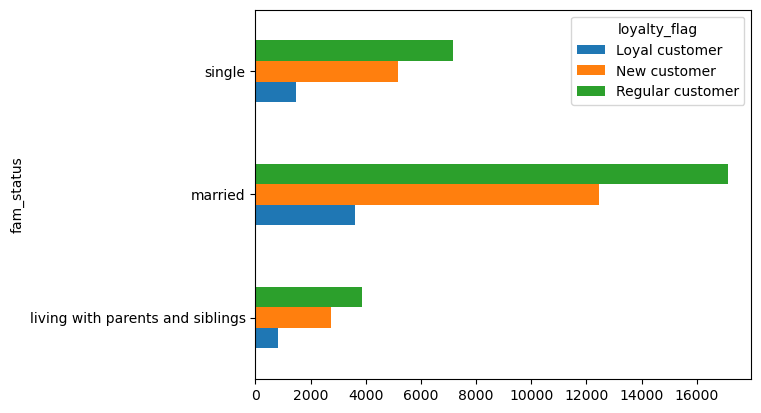

In [11]:
bar12=df1.groupby('fam_status')['loyalty_flag'].value_counts().unstack().plot.barh()

In [12]:
bar12.figure.savefig(os.path.join(path, 'Prepared Data', 'YLS_LoyaltyFlag.png'))

### 3 -analyzing Young Low Spender purshease by  sales amount

In [13]:
Df1=df[['user_id','prices','loyalty_flag']]

In [14]:
Df1

,user_id,prices,loyalty_flag
8,33890,12.3,Regular customer
9,33890,12.8,Regular customer
10,33890,6.1,Regular customer
11,33890,12.1,Regular customer
12,33890,9.0,Regular customer
...,...,...,...
10907400,41926,1.6,New customer
10907401,41926,7.2,New customer
10907404,53943,8.2,New customer
10907406,66119,12.2,New customer


In [15]:
df11=Df1.groupby('loyalty_flag')['prices'].sum()

In [16]:
df11

loyalty_flag
Loyal customer      27663732.1
New customer        10539115.4
Regular customer    43224340.1
Name: prices, dtype: float64

#### -creating and saving plot

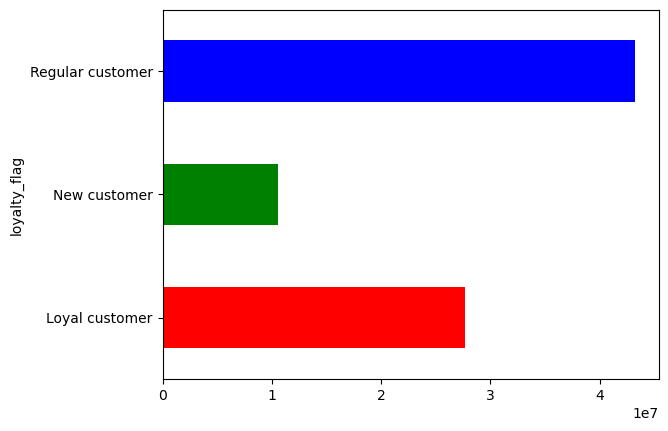

In [17]:
bar22=Df1.groupby('loyalty_flag')['prices'].sum().plot.barh(color=['red', 'green','blue'])

In [18]:
bar22.figure.savefig(os.path.join(path, 'Prepared Data', 'YLS_LoyaltyFlagPrices.png'))

### 4 -analyzing Young Low Spender by Busiest_day

In [19]:
df4=df[['user_id','STATE', 'busiest_day', 'day_of_week']]

In [20]:
df4

,user_id,STATE,busiest_day,day_of_week
8,33890,New Mexico,Busiest days,1
9,33890,New Mexico,Regularly days,6
10,33890,New Mexico,Regularly days,6
11,33890,New Mexico,Regularly days,6
12,33890,New Mexico,Regularly days,6
...,...,...,...,...
10907400,41926,Arkansas,Regularly days,5
10907401,41926,Arkansas,Slowest days,3
10907404,53943,Minnesota,Busiest days,1
10907406,66119,Nevada,Regularly days,6


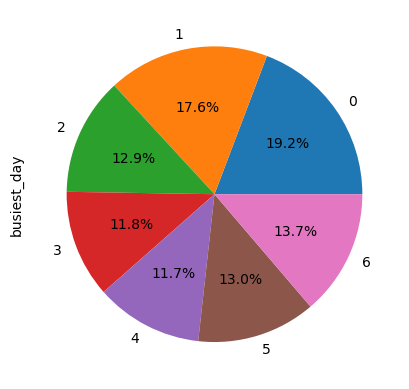

In [21]:
pie24=df4.groupby('day_of_week')['busiest_day'].count().plot(kind='pie', autopct='%0.01f%%')

In [22]:
pie24.figure.savefig(os.path.join(path, 'Prepared Data', 'YLS_BusiestDayOfWeek.png'))

In [23]:
df4.groupby('day_of_week')['busiest_day'].count()

day_of_week
0    2022962
1    1854336
2    1354709
3    1236989
4    1235117
5    1368532
6    1446046
Name: busiest_day, dtype: int64

### 5 Analyzing by prefered hour of day

In [24]:
df44=df[['order_hour_of_day','user_id']]

In [25]:
df44.groupby('order_hour_of_day')['user_id'].count()

order_hour_of_day
0      73204
1      37946
2      23272
3      17189
4      17506
5      28753
6      97852
7     291400
8     560293
9     804464
10    903140
11    892231
12    847714
13    863058
14    873369
15    866175
16    818378
17    667382
18    520339
19    402554
20    314873
21    259286
22    209149
23    129164
Name: user_id, dtype: int64

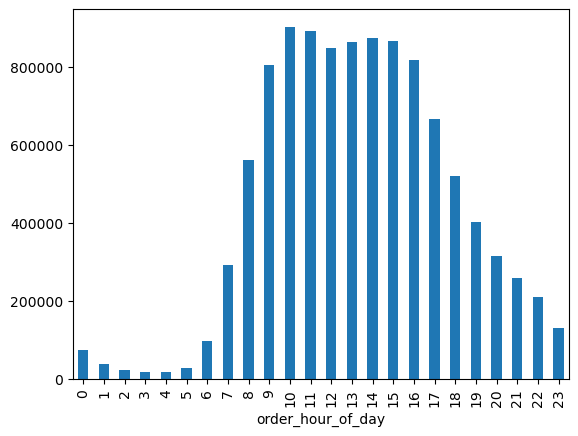

In [26]:
bar44=df44.groupby('order_hour_of_day')['user_id'].count().plot.bar()

In [27]:
bar44.figure.savefig(os.path.join(path, 'Prepared Data', 'YLS_BusiestHourOfDay.png'))

### 6 Analyzing number of Young Low Spender by State

In [28]:
df5=df[['user_id','STATE']]

In [29]:
DF5=df5.drop_duplicates().reset_index()

In [30]:
DF5

,index,user_id,STATE
0,8,33890,New Mexico
1,25,65803,Idaho
2,50,125935,Iowa
3,95,130797,Maryland
4,164,152052,Montana
...,...,...,...
54422,10876198,176747,Oregon
54423,10884972,172046,Nevada
54424,10895587,125626,Idaho
54425,10900242,153361,Arkansas


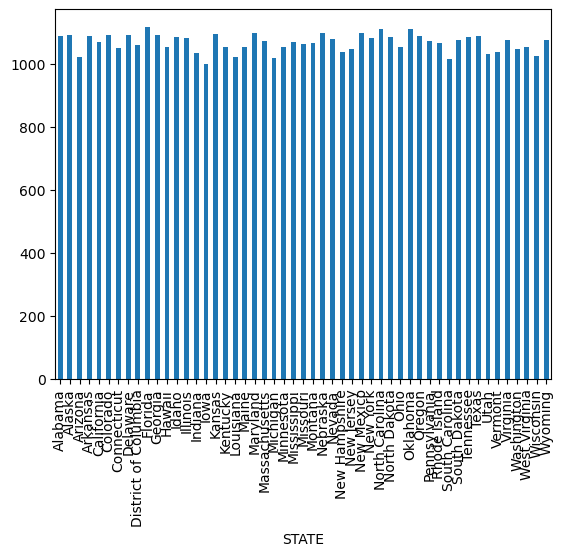

In [31]:
bar15=DF5.groupby('STATE')['user_id'].count().plot.bar()

In [32]:
DF5.groupby('STATE')['user_id'].count()

STATE
Alabama                 1090
Alaska                  1093
Arizona                 1021
Arkansas                1090
California              1069
Colorado                1091
Connecticut             1049
Delaware                1091
District of Columbia    1060
Florida                 1118
Georgia                 1092
Hawaii                  1054
Idaho                   1084
Illinois                1081
Indiana                 1034
Iowa                     999
Kansas                  1096
Kentucky                1054
Louisiana               1022
Maine                   1055
Maryland                1098
Massachusetts           1073
Michigan                1019
Minnesota               1054
Mississippi             1068
Missouri                1062
Montana                 1066
Nebraska                1098
Nevada                  1080
New Hampshire           1038
New Jersey              1046
New Mexico              1098
New York                1082
North Carolina          1110
North Da

In [33]:
bar15.figure.savefig(os.path.join(path, 'Prepared Data', 'YLUsersNumberState.png'))

### 7 Analyzing Young Low Spenders  by n_dependants

In [34]:
df6=df[['user_id', 'n_dependants']]

In [35]:
DF6=df6.drop_duplicates()

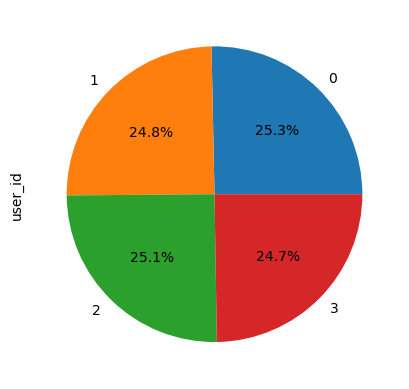

In [36]:
pie16=df6.groupby(['n_dependants'])['user_id'].nunique().plot(kind='pie', autopct='%0.01f%%')

In [37]:
df6

,user_id,n_dependants
8,33890,0
9,33890,0
10,33890,0
11,33890,0
12,33890,0
...,...,...
10907400,41926,1
10907401,41926,1
10907404,53943,2
10907406,66119,2


In [38]:
pie16.figure.savefig(os.path.join(path, 'Prepared Data', 'YLS_NDependansUsers.png'))

In [39]:
DF6.groupby(['n_dependants'])['user_id'].count()

n_dependants
0    13782
1    13504
2    13674
3    13467
Name: user_id, dtype: int64

### 8 Days since prior order

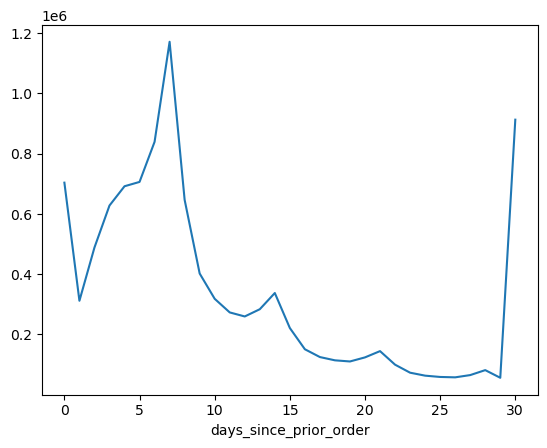

In [40]:
line17=df.groupby('days_since_prior_order')['days_since_prior_order'].count().plot(kind='line')

In [41]:
df.groupby('days_since_prior_order')['days_since_prior_order'].count()

days_since_prior_order
0      703920
1      311725
2      488491
3      627937
4      691972
5      706356
6      839461
7     1171716
8      646851
9      402232
10     318218
11     273022
12     259600
13     283609
14     337458
15     221216
16     150707
17     124789
18     113936
19     110162
20     123726
21     144529
22      99525
23      72879
24      63057
25      58717
26      57456
27      64940
28      81418
29      55986
30     913080
Name: days_since_prior_order, dtype: int64

In [42]:
line17.figure.savefig(os.path.join(path, 'Prepared Data', 'YLS_DaysSincePriorOrder.png'))

### 9  Defining TOP products for client group


 #### creating subset

In [43]:
df18=df[['product_name','product_id','prices']]

In [44]:
df18

,product_name,product_id,prices
8,Key Limes,8953,12.3
9,Organic Green Beans,15200,12.8
10,Organic Black Beans,27156,6.1
11,Avocado Oil,31912,12.1
12,Soda,196,9.0
...,...,...,...
10907400,Vegetable Oil,22128,1.6
10907401,Seedless Cucumbers,30827,7.2
10907404,Organic Baby Spinach,21903,8.2
10907406,24/7 Performance Light Weight Cat Litter,15175,12.2


#### identifying the most populare products counting orders rows  and selecting 10 TOP 

In [45]:
DF18=df18.groupby('product_name')['prices'].count().sort_values( ascending=False).reset_index().drop(index=2).head(10)

In [46]:
DF18

,product_name,prices
0,Banana,153333
1,Bag of Organic Bananas,123800
3,Organic Baby Spinach,79499
4,Organic Hass Avocado,70258
5,,64272
6,Organic Avocado,57883
7,Large Lemon,49610
8,Strawberries,45969
9,Limes,45599
10,Organic Whole Milk,45533


In [47]:
DF18=DF18.rename(columns={'prices':'count_orders'})

In [48]:
DF18

,product_name,count_orders
0,Banana,153333
1,Bag of Organic Bananas,123800
3,Organic Baby Spinach,79499
4,Organic Hass Avocado,70258
5,,64272
6,Organic Avocado,57883
7,Large Lemon,49610
8,Strawberries,45969
9,Limes,45599
10,Organic Whole Milk,45533


#### -creating plot

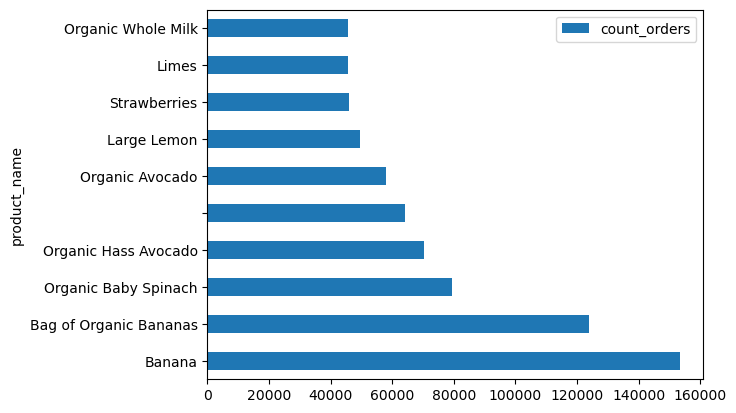

In [49]:
Bar21=DF18.plot.barh(x='product_name')

In [50]:
Bar21.figure.savefig(os.path.join(path, 'Prepared Data', 'YLS_Products.png'))

#### droping duplicates

In [51]:
df19=df18.drop_duplicates()

In [52]:
df19

,product_name,product_id,prices
8,Key Limes,8953,12.3
9,Organic Green Beans,15200,12.8
10,Organic Black Beans,27156,6.1
11,Avocado Oil,31912,12.1
12,Soda,196,9.0
...,...,...,...
10887603,Strawberry Nectar,19524,11.1
10895349,Citrus Vodka,21396,10.1
10895663,Jumbo Papaya,25019,4.0
10900489,Ignatia Amara 6C Homeopathic Pellets,25611,3.0


#### sorting by descending order to see YLS TOP products

In [53]:
df19.loc[df19['prices']>=1000].sort_values(by='prices', ascending=False).head(10)

,product_name,product_id,prices
